In [147]:
# Import required modules
import pandas as pd

In [148]:
# Read everything as a text file
inputFile = "vlp_sample_simple.tpd"
with open(inputFile, 'r') as f:
    lines = f.readlines()
lines = [line.strip() for line in lines] # Just remove end of line everywhere

In [149]:
# Identify key sections in tpd file
sensVarsHeader = "# Number of Sensitivity Variables"
sensVarsHeaderIndex = lines.index(sensVarsHeader)
sensVarsNum = int(lines[sensVarsHeaderIndex + 1])

calcVarsHeader = "# Number of Calculated Values (columns)"
calcVarsHeaderIndex = lines.index(calcVarsHeader)
calcVarsNum = int(lines[calcVarsHeaderIndex + 1])
calcVarsNames = lines[calcVarsHeaderIndex+2:calcVarsHeaderIndex+calcVarsNum+2]

ratesHeader = "# Rate Values"
ratesHeaderIndex = lines.index(ratesHeader)
rates = lines[ratesHeaderIndex+1:][0].split(",")
rates = [float(rate) for rate in rates] # Flowrates in MMscfd
ratesNum = len(rates)

pressHeader = "(Boundary Pressure)"
pressHeaderIndex = [idx for idx, s in enumerate(lines) if pressHeader in s][0]
press = lines[pressHeaderIndex + 1].split(",")
press = [float(pres) for pres in press] # Wellhead pressures in psig
pressNum = len(press)

resultsHeader = "# 3 Variable TPD Results"
resultsHeaderIndex = lines.index(resultsHeader)

In [150]:
# Read the main tabular data into a dataframe
data = pd.read_csv(inputFile, sep=",", skiprows=resultsHeaderIndex+1, header=None)

# Set dataframe column names (calculated variables names)
data.columns = calcVarsNames

# Create flowrates and wellhead pressures columns
ratesColumn = rates * pressNum
pressColumn = [y for x in press for y in (x,)*ratesNum]
vlpColumn = ["VLP#" + str(x[0]+1) for x in enumerate(press) for y in (x,)*ratesNum]

# Add columns to dataframe
data.insert(loc = 0, column = 'FlowRate', value = ratesColumn)
data.insert(loc = 0, column = 'WHP', value = pressColumn)
data.insert(loc = 0, column = 'VLP', value = vlpColumn)

<AxesSubplot:xlabel='FlowRate', ylabel='# 5000 - Flowing Bottom Hole Pressure'>

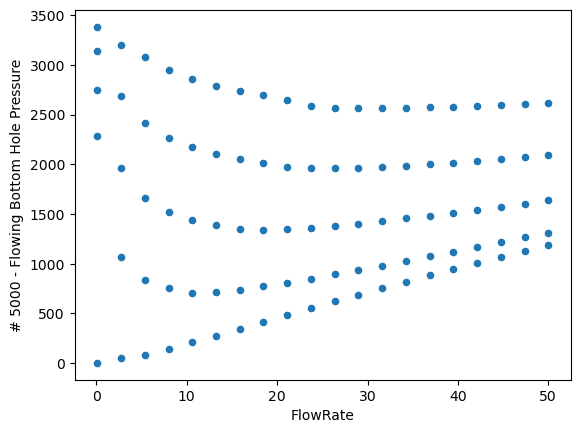

In [154]:
# Plot something...
data.plot.scatter(x='FlowRate', y='# 5000 - Flowing Bottom Hole Pressure')

In [152]:
lines[129]

'13'